In [1]:
import numpy as np
import pandas as pd
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
%matplotlib inline

dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M:%S')

def normalize(A):
    A -= A.mean(); A /= A.std()
    return A

def fix_raw(filename): 
    raw = pd.read_table(filename, sep='\t', encoding='utf-16', parse_dates={'datetime': [0]}, date_parser=dateparse)
    data = pd.DataFrame({'datetime' : raw['datetime'],'CO2ppm': raw['CO2 ppm']})
    data = data.set_index('datetime')
    data.CO2ppm = pd.to_numeric(data.CO2ppm)
    return data

########################### main ########################################

df = fix_raw('20150302_CO2Outside_Down.txt')
print df.head()


                     CO2ppm
datetime                   
2015-03-02 00:00:00   562.9
2015-03-02 00:00:01   562.7
2015-03-02 00:00:03   562.7
2015-03-02 00:00:04   562.5
2015-03-02 00:00:06   562.1


In [2]:
## restricting to data not near midnight
start = 60*60*3+60*13+36
# one hour time
end = start+60*60
df = df[start:end]
print "start: \n", df.head(1)
print "\n end: \n", df.tail(1)

start: 
                     CO2ppm
datetime                   
2015-03-02 06:57:37   648.2

 end: 
                     CO2ppm
datetime                   
2015-03-02 08:34:19   781.5


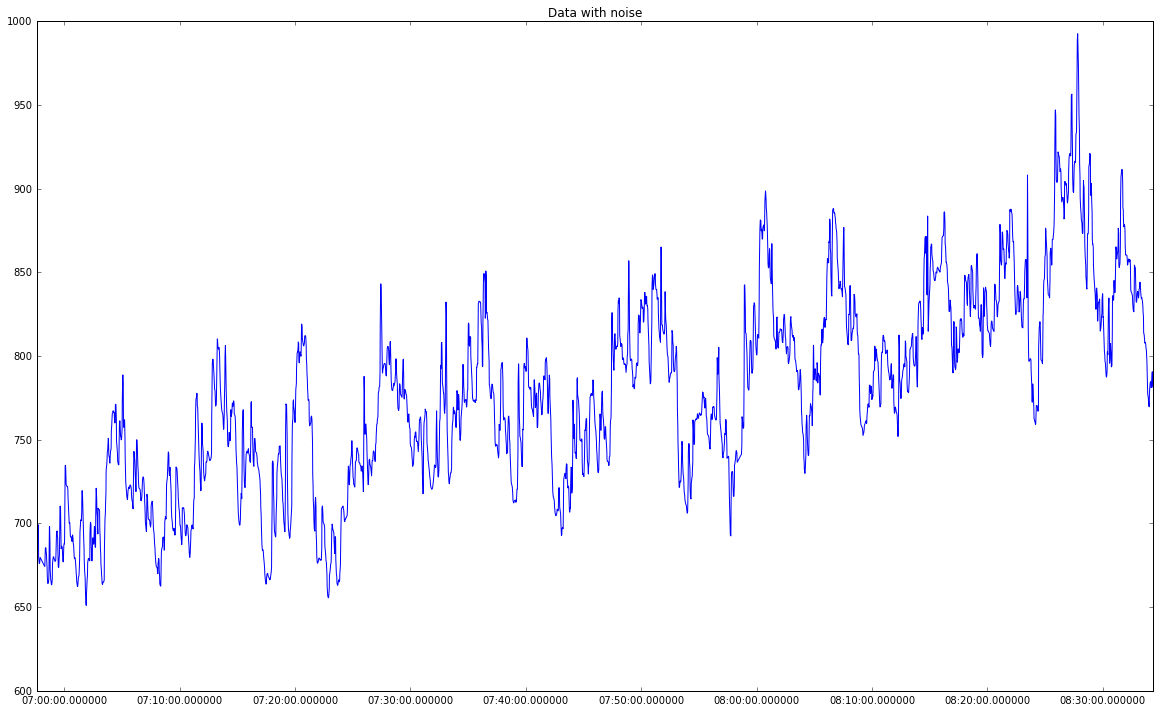

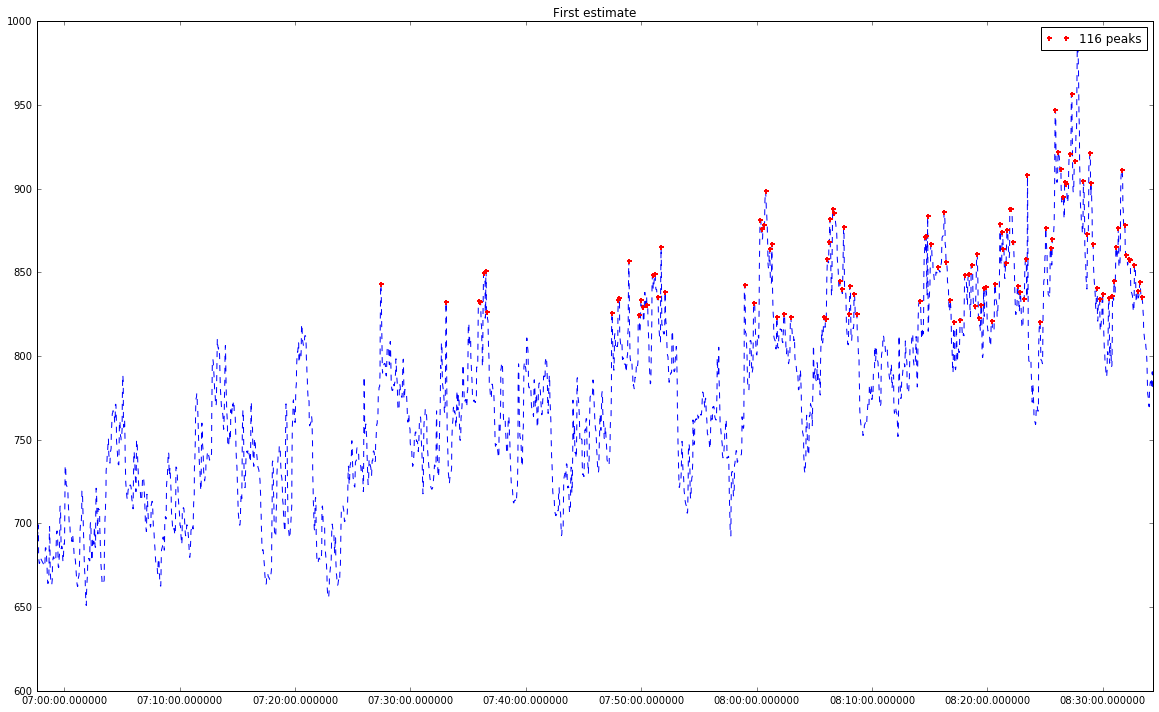

In [8]:
# find peaks, first attemp
y = np.array(df.CO2ppm)
pyplot.figure(figsize=(20,12))
x = np.linspace(0, len(y)-1, len(y))
pyplot.plot(df.index, y)
pyplot.title("Data with noise")
indexes = peakutils.indexes(y, thres=.5, min_dist=2)
#print(indexes)
#print(x[indexes], y[indexes])
pyplot.figure(figsize=(20,12))
pplot(df.index, y, indexes)
pyplot.title('First estimate')

In [9]:
# you can print the (x,y) indicies of the found peaks
print indexes

[1105 1317 1424 1428 1440 1446 1450 1856 1876 1879 1910 1943 1949 1956 1971
 1988 1995 2005 2015 2028 2274 2305 2324 2329 2336 2341 2354 2362 2379 2402
 2424 2532 2536 2543 2547 2550 2561 2565 2584 2589 2595 2612 2617 2629 2638
 2843 2860 2863 2868 2880 2901 2922 2929 2941 2953 2974 2989 3002 3010 3021
 3029 3035 3042 3050 3056 3076 3086 3103 3111 3114 3121 3126 3136 3139 3146
 3160 3169 3181 3187 3192 3232 3251 3268 3274 3283 3291 3300 3307 3313 3319
 3330 3336 3347 3355 3374 3387 3395 3399 3405 3417 3426 3437 3456 3469 3473
 3480 3487 3499 3508 3513 3521 3525 3540 3550 3558 3563]


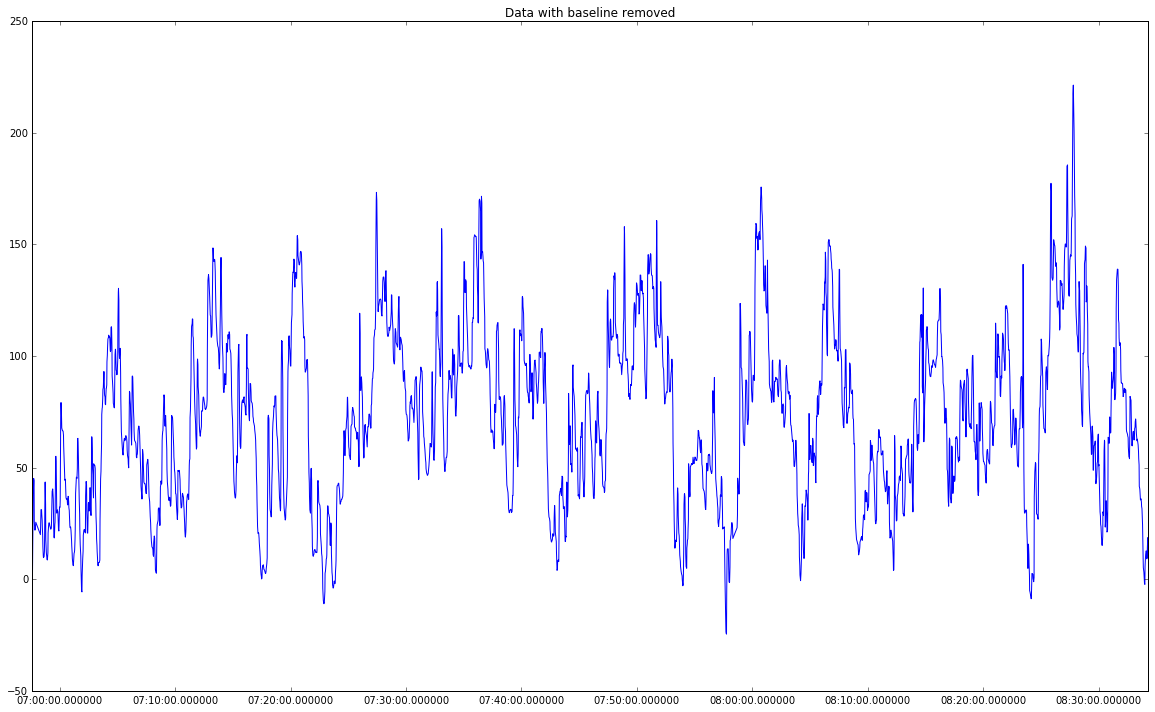

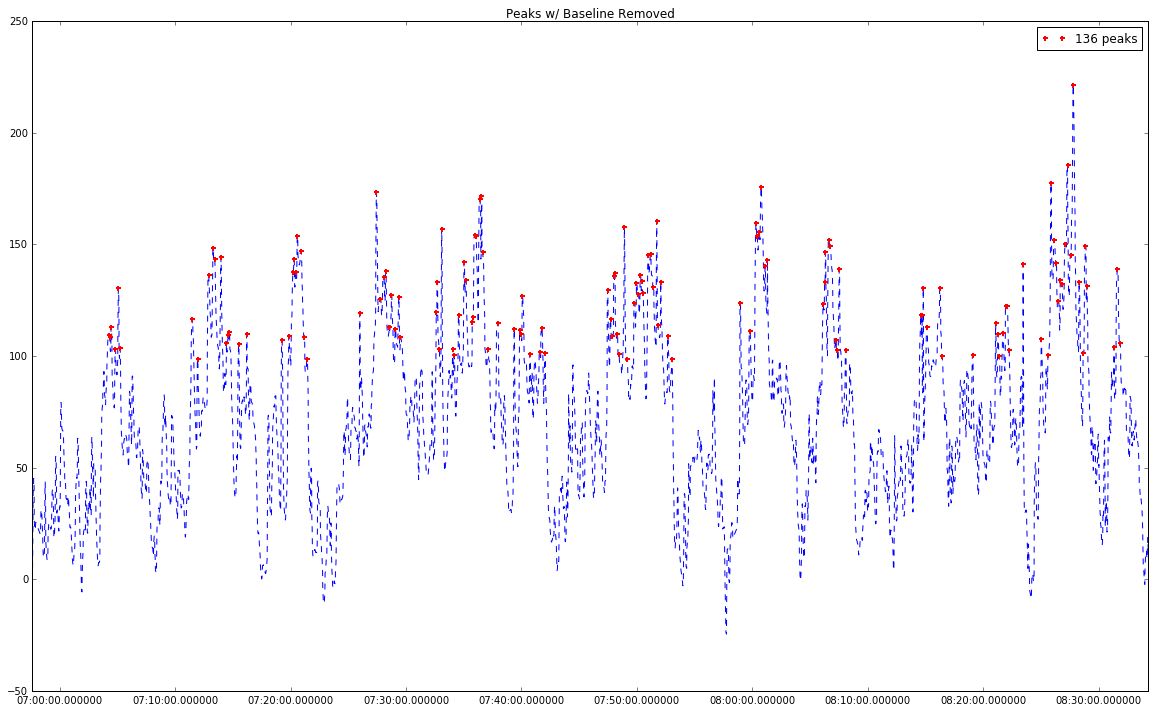

In [14]:
# a more developed approach: removing the baseline 
# assuming a 4th degree polynomial 

base = peakutils.baseline(y, deg=4)
new_y = y-base

pyplot.figure(figsize=(20,12))
pyplot.plot(df.index, new_y)
pyplot.title("Data with baseline removed")

indexes_b = peakutils.indexes(new_y, thres=.5, min_dist=2)
pyplot.figure(figsize=(20,12))
pplot(df.index, new_y, indexes_b)
pyplot.title('Peaks w/ Baseline Removed')